

# Comparación entre los modelos de reducción de dimensionalidad t-SNE y UMAP



## Introducción

Vamos a ver cómo implementar dos algoritmos avanzados de reducción de dimensionalidad: t-SNE y UMAP, aplicados a datos sintéticos. Compararemos los resultados con los obtenidos al aplicar PCA (Análisis de Componentes Principales) sobre el mismo conjunto de datos.

Primero, generaremos un conjunto de datos sintético con agrupaciones (blobs) en un espacio de características tridimensional, y lo visualizaremoss mediante un gráfico 3D interactivo.

Después, utilizaremos los tres algoritmos para proyectar esos datos en dos dimensiones.


### Importamos las bibliotecas necesarias


In [2]:
# Importamos NumPy, una biblioteca para cálculos numéricos y manejo de arrays
import numpy as np

# Importamos Matplotlib para crear gráficos estáticos
import matplotlib.pyplot as plt

# Importamos Pandas para manipular y analizar datos en forma de tablas (DataFrames)
import pandas as pd

# Importamos la función make_blobs para generar datos sintéticos agrupados (blobs)
from sklearn.datasets import make_blobs

# Importamos StandardScaler para normalizar los datos antes de aplicar algoritmos
from sklearn.preprocessing import StandardScaler

# Importamos UMAP desde su módulo específico para aplicar reducción de dimensionalidad no lineal
import umap.umap_ as UMAP

# Importamos t-SNE, otro algoritmo de reducción de dimensionalidad no lineal
from sklearn.manifold import TSNE

# Importamos PCA, un algoritmo de reducción de dimensionalidad lineal
from sklearn.decomposition import PCA

# Importamos Plotly Express para crear gráficos interactivos (ideal para visualizaciones en 2D y 3D)
import plotly.express as px

### Generar datos sintéticos con cuatro agrupaciones en un espacio tridimensional


In [3]:
# Definimos los centros de los cuatro grupos (clusters) en un espacio tridimensional (3D)
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

# Definimos la desviación estándar (dispersión) de cada grupo
cluster_std = [1, 1, 2, 3.5]

# Generamos los datos sintéticos (blobs) con 500 muestras distribuidas en los centros definidos
# n_features=3 indica que cada muestra tiene tres características (dimensiones)
# random_state=42 asegura que los resultados sean reproducibles
X, labels_ = make_blobs(n_samples=500,
                        centers=centers,
                        n_features=3,
                        cluster_std=cluster_std,
                        random_state=42)

### Mostramos los datos en un gráfico de dispersión 3D interactivo con Plotly


In [4]:
# Creamos un DataFrame con los datos sintéticos X, asignando nombres a las columnas para Plotly
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

# Creamos un gráfico de dispersión 3D interactivo con Plotly Express
# Usamos las columnas X, Y y Z como coordenadas espaciales
# Coloramos los puntos según las etiquetas de los blobs (convertidas a texto para que Plotly las trate como categorías)
# Ajustamos la opacidad y usamos una paleta de colores cualitativa
fig = px.scatter_3d(df,
                    x='X',
                    y='Y',
                    z='Z',
                    color=labels_.astype(str),
                    opacity=0.7,
                    color_discrete_sequence=px.colors.qualitative.G10,
                    title="Gráfico 3D de dispersión de cuatro agrupaciones")

# Personalizamos los marcadores: tamaño de los puntos y borde negro
# Ocultamos la leyenda para simplificar la visualización
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)

# Ajustamos el diseño del gráfico: eliminamos la barra de colores y definimos el tamaño del gráfico
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)

# Mostramos el gráfico interactivo
fig.show()

### Interactúa con el gráfico
Haz clic en los iconos situados en la parte superior derecha del gráfico para activar los modos de zoom, rotación y desplazamiento.
Luego, utiliza el ratón para explorar el gráfico de forma interactiva.
Esta es una excelente manera de inspeccionar datos en 3D, ya que es difícil obtener información útil a partir de un gráfico 3D estático.
### Información sobre los 4 grupos:
* Los blobs tienen densidades diferentes.
* Uno de los blobs es claramente distinto de los demás.
* Los dos blobs más grandes son diferentes entre sí, pero ambos presentan cierto solapamiento con el blob que se encuentra entre ellos.


### Estandarizamos los datos para prepararlos para los tres métodos de reducción de la dimensionalidad.


In [5]:
# Creamos el objeto StandardScaler, que se utiliza para estandarizar las características
# (es decir, para que tengan media 0 y desviación estándar 1)
scaler = StandardScaler()

# Aplicamos el escalado a los datos X. El método fit_transform primero ajusta el escalador a los datos
# (calculando la media y la desviación estándar) y luego transforma los datos usando esos parámetros.
X_scaled = scaler.fit_transform(X)

### Usamos t-SNE para reducir la dimensionalidad a 2D

Aquí se establece el valor de perplexity en 30, que es el valor predeterminado. Los resultados pueden variar bastante si modificas este parámetro.

Perplexity es un parámetro que controla el equilibrio entre la atención que el algoritmo presta a la estructura local (vecinos cercanos) y la global (estructura general del conjunto de datos). Una perplexity baja, se focaliza más en la estructura local y una alta en la estrucutra global. Se puede interpretar como una estimación del número de vecinos cercanos que se consideran al calcular las similitudes.

Suele usarse un valor entre 5 y 50, este debe ser mucho menor que el número de observaciones (un tercio puede estar bien).


In [6]:
# Creamos una instancia del algoritmo t-SNE con los siguientes parámetros:
# - n_components=2: reducimos los datos a 2 dimensiones para poder visualizarlos en un plano.
# - random_state=42: fijamos la semilla aleatoria para obtener resultados reproducibles.
# - perplexity=30: número aproximado de vecinos considerados al calcular las similitudes (valor típico).
# - max_iter=1000: número máximo de iteraciones para optimizar la representación.
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)

# Aplicamos t-SNE a los datos previamente escalados.
# El método fit_transform ajusta el modelo y transforma los datos en una nueva representación de 2 dimensiones.
X_tsne = tsne.fit_transform(X_scaled)

### Hacemos el gráfico del resultado del t-SNE de 2 dimensiones.


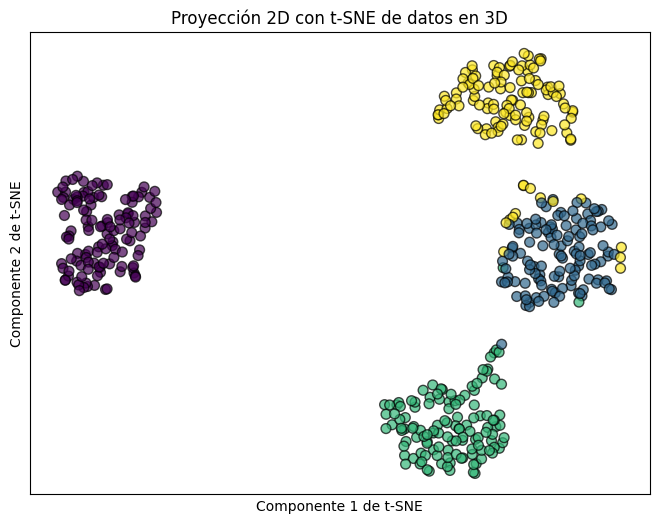

In [7]:
# Creamos una figura de tamaño 8x6 pulgadas para la visualización
fig = plt.figure(figsize=(8, 6))

# Añadimos un único eje (subgráfico) a la figura
ax = fig.add_subplot(111)

# Dibujamos un diagrama de dispersión (scatter plot) con los datos transformados por t-SNE
# - X_tsne[:, 0] y X_tsne[:, 1] son las dos componentes obtenidas por t-SNE
# - c=labels_ indica que los colores de los puntos se asignan según las etiquetas de clase
# - cmap='viridis' define la paleta de colores
# - s=50 define el tamaño de los puntos
# - alpha=0.7 da cierta transparencia a los puntos
# - edgecolor='k' dibuja un borde negro alrededor de cada punto
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

# Añadimos un título al gráfico
ax.set_title("Proyección 2D con t-SNE de datos en 3D")

# Etiquetamos los ejes con los nombres de las componentes
ax.set_xlabel("Componente 1 de t-SNE")
ax.set_ylabel("Componente 2 de t-SNE")

# Ocultamos las marcas de los ejes para una visualización más limpia
ax.set_xticks([])
ax.set_yticks([])

# Mostramos el gráfico en pantalla
plt.show()

### Conclusiones del resultado t-SNE
* t-SNE proyectó los datos en cuatro agrupaciones distintas, aunque en los datos originales había cierto solapamiento entre algunos grupos.
* Se puede observar que algunos puntos acabaron en el “grupo incorrecto”, aunque, siendo justos, t-SNE no tiene conocimiento previo de a qué grupo pertenece cada punto.
* Todos los grupos presentan densidades similares.
* Dos de las agrupaciones son claramente distintas entre sí, pero “cedieron” algunos puntos al grupo con el que originalmente se solapaban.
* Un resultado “perfecto” no separaría completamente las zonas de solapamiento entre grupos.
* La distancia entre los grupos en la proyección es coherente con el grado de separación que tenían originalmente.

## Comparamos la reducción a dos dimensiones de UMAP y PCA


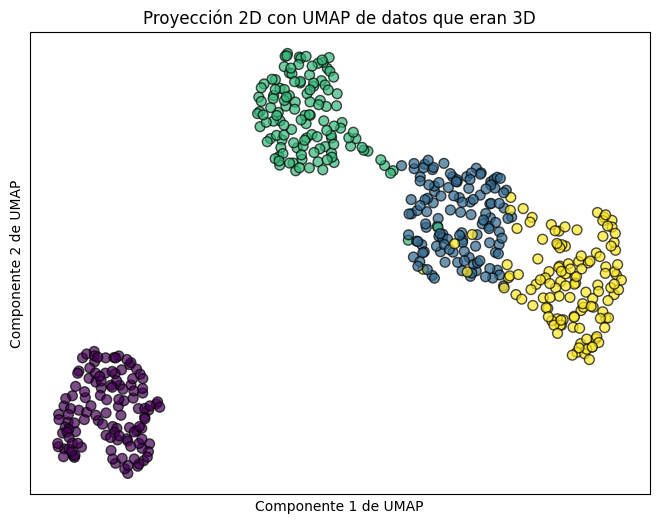

In [11]:
# Aplicamos UMAP para reducir la dimensionalidad de los datos a 2 dimensiones
# - n_components=2: queremos obtener una representación en 2D
# - random_state=42: fijamos la semilla para que los resultados sean reproducibles
# - min_dist=0.5: controla la distancia mínima entre puntos en la proyección (mayor valor = más dispersión)
# - spread=1: controla la extensión general de los puntos en el espacio embebido
# - n_jobs=1: número de núcleos de CPU usados (1 = sin paralelización)
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1, n_jobs=1)

# Transformamos los datos escalados con el modelo UMAP
X_umap = umap_model.fit_transform(X_scaled)

# Creamos una figura de tamaño 8x6 pulgadas para visualizar los resultados
fig = plt.figure(figsize=(8, 6))

# Añadimos un único eje (subgráfico) a la figura
ax = fig.add_subplot(111)

# Dibujamos un diagrama de dispersión con los datos proyectados por UMAP
# - X_umap[:, 0] y X_umap[:, 1] son las dos componentes obtenidas
# - c=labels_ colorea los puntos según sus etiquetas
# - cmap='viridis' define la paleta de colores
# - s=50 es el tamaño de los puntos
# - alpha=0.7 da transparencia
# - edgecolor='k' añade borde negro a los puntos
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

# Añadimos título y etiquetas a los ejes
ax.set_title("Proyección 2D con UMAP de datos que eran 3D")
ax.set_xlabel("Componente 1 de UMAP")
ax.set_ylabel("Componente 2 de UMAP")

# Ocultamos las marcas de los ejes para una visualización más limpia
ax.set_xticks([])
ax.set_yticks([])

# Mostramos el gráfico
plt.show()

### Conclusiones de los resultados con UMAP
* UMAP proyectó correctamente los datos en cuatro agrupaciones parcialmente diferenciadas, con una de ellas completamente separada del resto.
* A diferencia de t-SNE, UMAP ha conservado la conectividad que existía originalmente entre los grupos parcialmente solapados.
* Se puede observar que, al igual que con t-SNE, algunos puntos acabaron en el “grupo incorrecto”.
* También como en t-SNE, todos los grupos presentan densidades similares.
* Un resultado “perfecto” no separaría completamente las zonas de solapamiento entre grupos, ya que en el espacio original de características esos solapamientos realmente existen.
* La distancia entre los grupos en la proyección es coherente con el grado de separación que tenían originalmente.

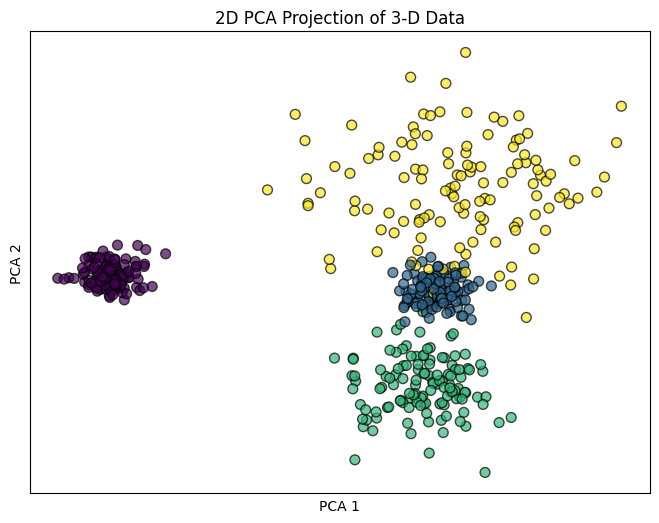

In [9]:
# Aplicamos PCA para reducir la dimensionalidad de los datos a 2 dimensiones
# - n_components=2: queremos obtener una representación en 2D
pca = PCA(n_components=2)

# Ajustamos el modelo PCA a los datos escalados y los transformamos
# Esto proyecta los datos originales en las dos primeras componentes principales
X_pca = pca.fit_transform(X_scaled)

# Creamos una figura de tamaño 8x6 pulgadas para visualizar los resultados
fig = plt.figure(figsize=(8, 6))

# Añadimos un único eje (subgráfico) a la figura
ax2 = fig.add_subplot(111)

# Dibujamos un diagrama de dispersión con los datos proyectados por PCA
# - X_pca[:, 0] y X_pca[:, 1] son las dos primeras componentes principales
# - c=labels_ colorea los puntos según sus etiquetas
# - cmap='viridis' define la paleta de colores
# - s=50 es el tamaño de los puntos
# - alpha=0.7 da transparencia
# - edgecolor='k' añade borde negro a los puntos
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

# Añadimos título y etiquetas a los ejes
ax2.set_title("Proyección 2D con PCA de datos en 3D")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")

# Ocultamos las marcas de los ejes para una visualización más limpia
ax2.set_xticks([])
ax2.set_yticks([])

# Mostramos el gráfico
plt.show()

### Conclusiones de los resultados de PCA
* PCA preserva fielmente las densidades relativas de los grupos.
* También conserva la separación relativa entre los grupos.
* La distancia entre las agrupaciones es muy coherente con el grado de separación que tenían originalmente.
* PCA y t-SNE tardaron muy poco en completarse en comparación con UMAP.
* En mi opinión, PCA superó tanto a t-SNE como a UMAP en este experimento.
Esto pone de manifiesto una tendencia común a querer aplicar algoritmos más avanzados.
* El resultado por defecto no siempre supone una mejora respecto a métodos más simples y consolidados.
